{'od280/od315_of_diluted_wines', 'flavanoids'}
target      1.000000
MedInc      0.688075
AveRooms    0.151948
Latitude    0.144160
HouseAge    0.105623
Name: target, dtype: float64
target      1.000000
MedInc      0.676778
AveRooms    0.263367
AveOccup    0.256594
Latitude    0.165739
Name: target, dtype: float64
Outliers:
       battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0             False  False        False     False  False   False       False   
1             False  False        False     False  False   False       False   
2             False  False        False     False  False   False       False   
3             False  False        False     False  False   False       False   
4             False  False        False     False  False   False       False   
...             ...    ...          ...       ...    ...     ...         ...   
1995          False  False        False     False  False   False       False   
1996          False  False        

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
10,769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0
19,682,1,0.5,0,4,0,19,1.0,121,4,11,902,1064,2337,11,1,18,0,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,9,1358,1739,3532,17,11,12,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,20,698,1018,1300,10,0,2,0,0,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,20,610,1437,2313,14,1,11,0,1,0
1983,1262,0,1.8,1,12,0,34,0.1,149,5,16,223,737,3248,13,3,4,0,1,1
1988,1547,1,2.9,0,2,0,57,0.4,114,1,3,347,957,1620,9,2,19,0,1,1


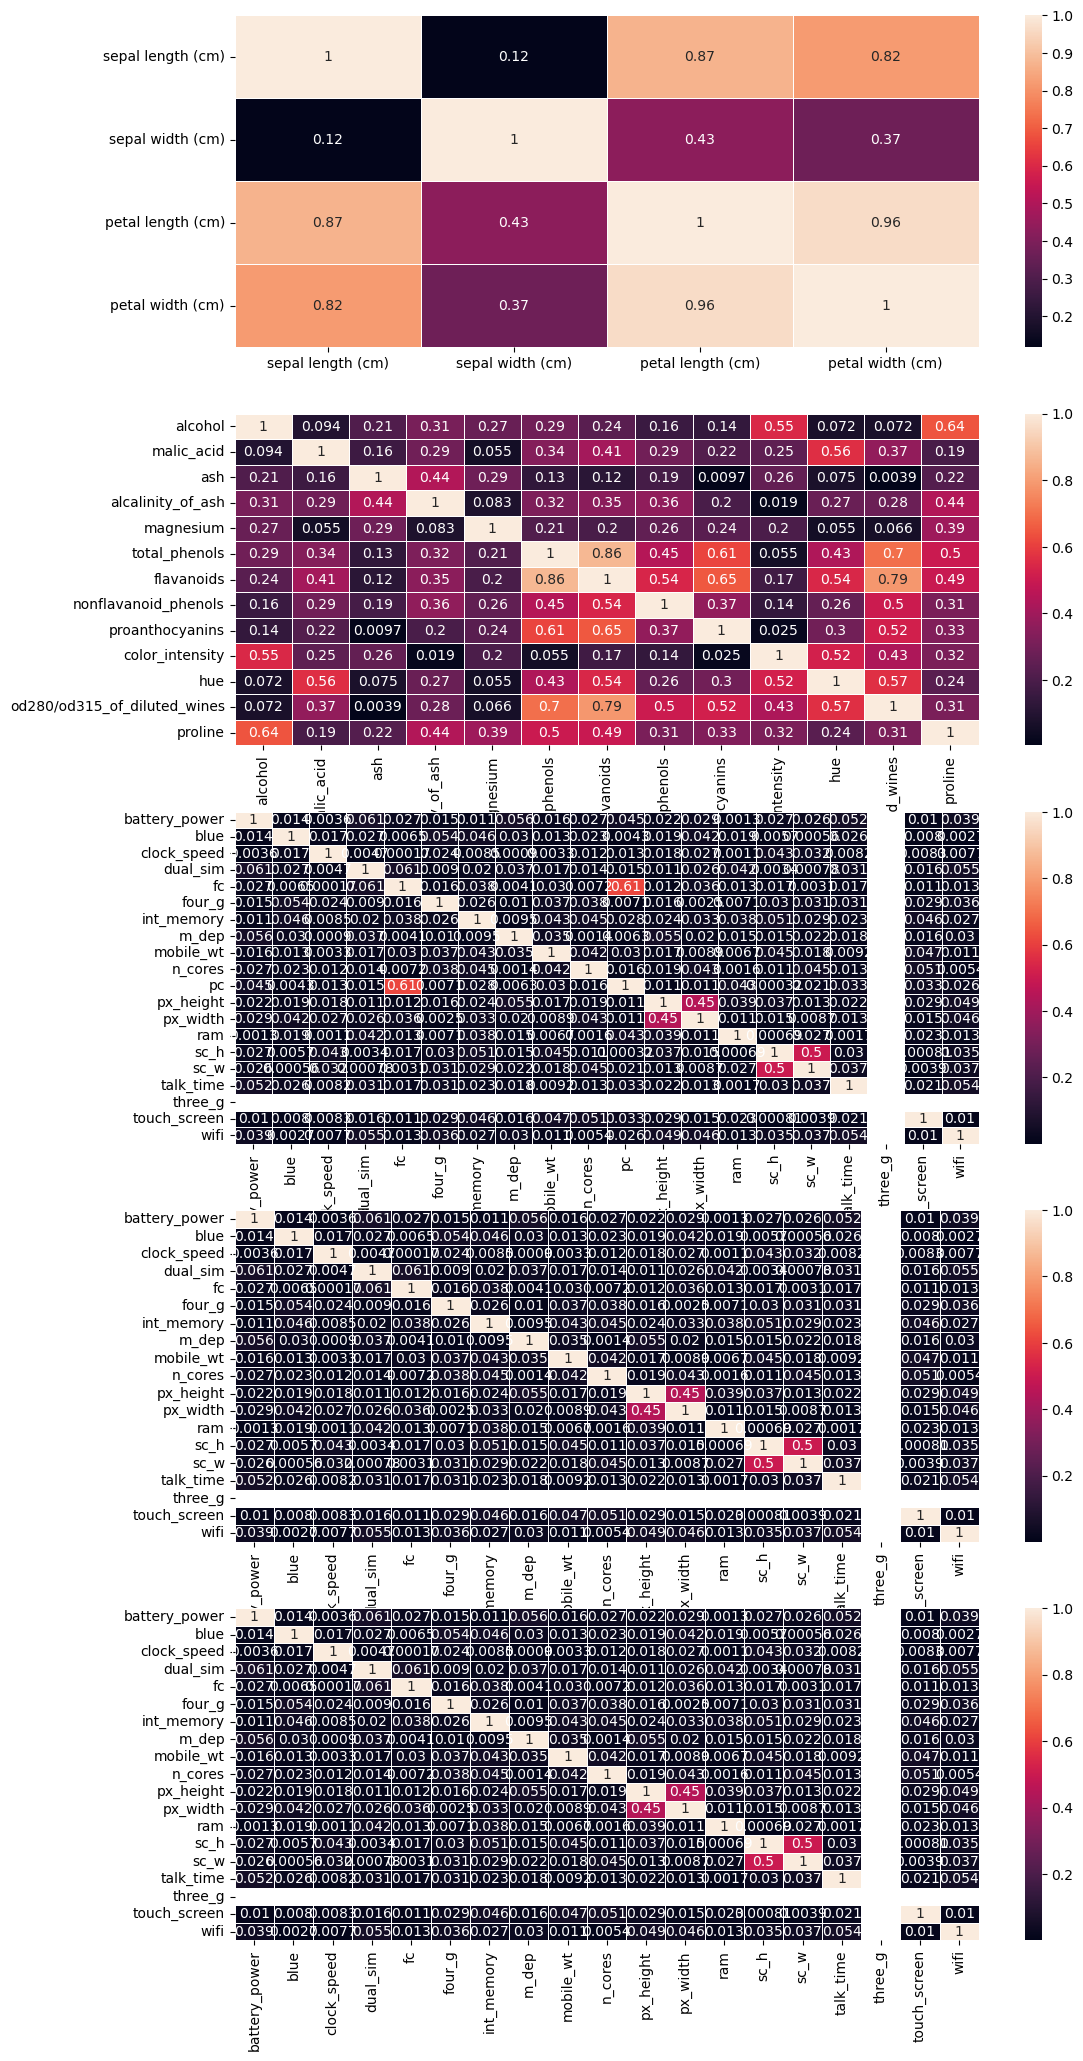

In [36]:
from sklearn.datasets import load_iris, load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
iris=load_iris()
wine=load_wine()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
wine_df=pd.DataFrame(data=wine.data, columns=wine.feature_names)
correlation_1=iris_df.corr().abs()
correlation_2=wine_df.corr().abs()
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(12,25))
sns.heatmap(correlation_1, annot=True, linewidth=.5, ax=ax1)
sns.heatmap(correlation_2, annot=True, linewidth=.5, ax=ax2)
iris_df
wine_df

threshold=0.7
corr_features=set()
for i in range(len(correlation_2.columns)):
    for j in range(i):
        if abs(correlation_2.iloc[i,j]) > threshold:
            corr_features.add(correlation_2.columns[i])
            if correlation_2.columns[i] in wine_df.columns:
                wine_df=wine_df.drop(correlation_2.columns[i], axis=1)
print(corr_features)
wine_df

california=fetch_california_housing()
california_df=pd.DataFrame(data=california.data, columns=california.feature_names)
california_df["target"]=california.target

correlation_3=california_df.corr()["target"].abs()
# Выбор n признаков с наибольшим абсолютным значением коэффициента
n = 5  # замените на нужное значение
top_features = correlation_3.sort_values(ascending=False).head(n)
print(top_features)

correlation_4 = california_df.corr(method='spearman')['target'].abs()
# Выбор наиболее значимых признаков
top_n_features = correlation_4.nlargest(n)
print(top_n_features)



mobile_df=pd.read_csv("D:/IDA/mobile_praces/train.csv") 
mobile_df_copy=mobile_df.drop("price_range", axis=1)
mobile_df_copy=mobile_df_copy.dropna()
Q1 = mobile_df_copy.quantile(0.25)
Q3 = mobile_df_copy.quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = (mobile_df_copy < (Q1 - 1. * IQR)) | (mobile_df_copy > (Q3 + 1. * IQR))
print("Outliers:\n", outliers)
mobile_df_copy
outlier_values = mobile_df_copy.loc[outliers.any(axis=1)]
mobile_df_copy=mobile_df_copy.drop(outlier_values.index, axis=0)

mobile_df_copy_6=mobile_df.copy()
#TARGET=mobile_df["price_range"]

corr_mobile=mobile_df_copy.corr().abs()
sns.heatmap(corr_mobile, annot=True, linewidth=0.5,ax=ax3)
threshold=0.5
corr_features=set()
for i in range(len(corr_mobile.columns)):
    for j in range(i):
        if corr_mobile.iloc[i,j] > threshold:
            corr_features.add(corr_mobile.columns[i])
            if corr_mobile.columns[i] in mobile_df_copy.columns:
                mobile_df_copy=mobile_df_copy.drop(corr_mobile.columns[i], axis=1)
print(corr_features)
mobile_df_copy

correlation_5= mobile_df.corr()["price_range"].abs()
top_features_5 = correlation_5.sort_values(ascending=False).head(n)
print(top_features_5)

correlation_5 = mobile_df.corr(method='spearman')['price_range'].abs()
# Выбор наиболее значимых признаков
top_n_features = correlation_5.nlargest(n)
print(top_n_features)

# Min-Max Scaling
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(mobile_df_copy), columns=mobile_df_copy.columns)
corr_6=df_normalized.corr().abs()
sns.heatmap(corr_6, annot=True,linewidth=.5, ax=ax4)

scaler=StandardScaler()

df_standardized  = pd.DataFrame(scaler.fit_transform(mobile_df_copy), columns=mobile_df_copy.columns)
corr_7=df_standardized.corr().abs()
sns.heatmap(corr_7, annot=True,linewidth=.5, ax=ax5)
mobile_df_copy
outlier_values